<a href="https://colab.research.google.com/github/Elma-dev/Hackthon_Problem_AI/blob/main/ModelPredictHackaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download Data

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdeljalilelmajjodi","key":"562629d8d86d757b377537f7114f7361"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! kaggle datasets download fanconic/skin-cancer-malignant-vs-benign --force

100% 324M/325M [00:03<00:00, 125MB/s]
100% 325M/325M [00:03<00:00, 104MB/s]


In [ ]:
!unzip skin-cancer-malignant-vs-benign.zip -d data

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: data/data/train/benign/420.jpg  
  inflating: data/data/train/benign/421.jpg  
  inflating: data/data/train/benign/422.jpg  
  inflating: data/data/train/benign/423.jpg  
  inflating: data/data/train/benign/424.jpg  
  inflating: data/data/train/benign/425.jpg  
  inflating: data/data/train/benign/426.jpg  
  inflating: data/data/train/benign/429.jpg  
  inflating: data/data/train/benign/43.jpg  
  inflating: data/data/train/benign/430.jpg  
  inflating: data/data/train/benign/431.jpg  
  inflating: data/data/train/benign/432.jpg  
  inflating: data/data/train/benign/434.jpg  
  inflating: data/data/train/benign/435.jpg  
  inflating: data/data/train/benign/438.jpg  
  inflating: data/data/train/benign/439.jpg  
  inflating: data/data/train/benign/440.jpg  
  inflating: data/data/train/benign/441.jpg  
  inflating: data/data/train/benign/442.jpg  
  inflating: data/data/train/benign/443.jpg  
  i

#Import Libs

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

import os

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

#ReadData

In [ ]:
folder_benign_train = 'data/data/train/benign'
folder_malignant_train = 'data/data/train/malignant'

folder_benign_test = 'data/data/test/benign'
folder_malignant_test = 'data/data/test/malignant'

read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

In [ ]:
# Load in training pictures 
ims_benign = [read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)]
X_benign = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_train, filename)) for filename in os.listdir(folder_malignant_train)]
X_malignant = np.array(ims_malignant, dtype='uint8')

# Load in testing pictures
ims_benign = [read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')

# Create labels
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])


# Merge data 
X_train = np.concatenate((X_benign, X_malignant), axis = 0)
y_train = np.concatenate((y_benign, y_malignant), axis = 0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

# Shuffle data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]

#Analyse

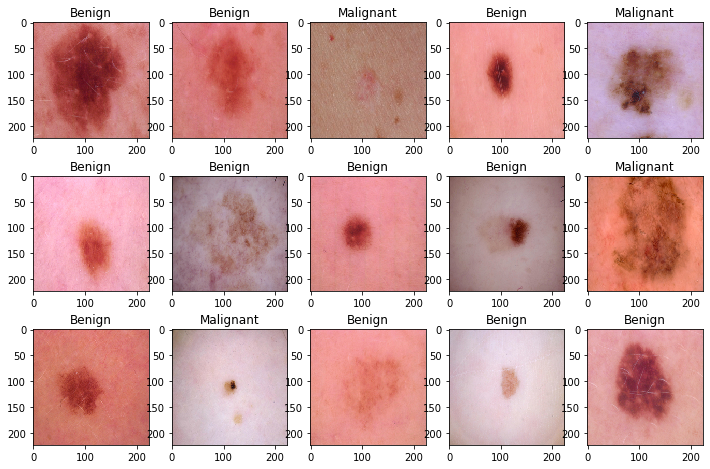

In [ ]:
# Display first 15 images of moles, and how they are classified
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

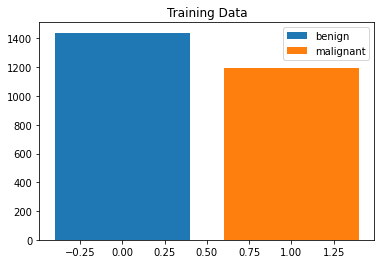

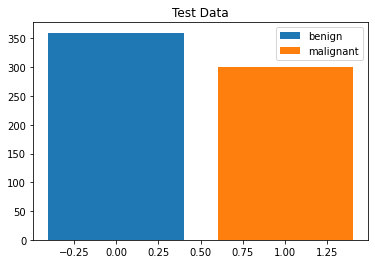

In [ ]:
plt.bar(0, y_train[np.where(y_train == 0)].shape[0], label = 'benign')
plt.bar(1, y_train[np.where(y_train == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Training Data")
plt.show()

plt.bar(0, y_test[np.where(y_test == 0)].shape[0], label = 'benign')
plt.bar(1, y_test[np.where(y_test == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Test Data")
plt.show()

#PreProcesing

In [ ]:
X_train = X_train/255.
X_test = X_test/255.
#Scaling of data

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train.reshape(X_train.shape[0],-1), y_train)

SVC()

In [ ]:
model.predict((X_test.reshape(X_test.shape[0],-1)[12]).reshape(-1,150528))[0]


1.0

In [ ]:
# saving the model
import pickle
pickle.dump(model, open('content\model.pkl', 'wb'))MB

#API

In [ ]:
!pip install flask_ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#SRV

In [ ]:
import flask
from flask import Flask, render_template, request
import pickle
import numpy as np
from flask_ngrok import run_with_ngrok
import warnings
warnings.filterwarnings('ignore')
import os 
from io import BytesIO
from PIL import Image
import keras.utils as image
import numpy as np

app = Flask(__name__)
run_with_ngrok(app)

#model = pickle.load(open('model.pkl', 'rb'))

@app.route('/', methods=['GET'])
def home():
  return {'Hello':'Hello'}

@app.route('/', methods=["POST"])
def predict():
    #return {'Hi':'Hi'}
    input_data = request.files['image']
    image_data = input_data.read()
    image_data = Image.open(BytesIO(image_data))
    #image.show()
    #image.save('output.jpg')
    rgb_im = image_data.convert('RGB')
    img=image.img_to_array(rgb_im)
    img=np.expand_dims(img,axis=0)
    img.reshape(img.shape[0],-1)
    #X_test.reshape(X_test.shape[0],-1)[0].shape
    prediction=model.predict((X_test.reshape(X_test.shape[0],-1)[0]).reshape(-1,150528))[0]

    #if prediction==0:
    return {'h':'Benign' if prediction==0 else 'Malignant'}

app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://8c9e-35-202-53-205.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [17/Mar/2023 06:07:19] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/Mar/2023 06:07:21] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [17/Mar/2023 06:07:21] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/Mar/2023 06:07:31] "POST / HTTP/1.1" 200 -
